In [2]:
!pip install segmentation_models_pytorch warmup_scheduler albumentations -q


In [1]:
import os
import sys
import random
from glob import glob
import warnings

import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2

sys.path.append('/kaggle/working/notebook/experiment/2d')
from script.helper import *
from script.dataset import *
from script.metrics import *
from script.trainer import *
from script.model import *
from script.loss import *
from script.scheduler import *


## config

In [2]:
class CFG:
    # ============== comp exp name =============
    comp_name = 'vesuvius'
    comp_dir_path = '/kaggle/input/'
    comp_folder_name = 'vesuvius-challenge-ink-detection'

    dataset_path = "/kaggle/working/dataset_train/"
    train_dataset_path = "/kaggle/working/dataset_train/flatten/3-8/"

    exp_name = os.getcwd().split('/')[-1]

    # ============== model cfg =============
    model_name = 'Unet'
    backbone = 'efficientnet-b0'
    in_chans = 6

    # ============== pred target =============
    target_size = 1

    # ============== training cfg =============
    size = 224
    tile_size = 224
    stride = tile_size // 2

    train_batch_size = 16  # 32
    valid_batch_size = train_batch_size * 2
    use_amp = True

    scheduler = 'GradualWarmupSchedulerV2'
    # scheduler = 'CosineAnnealingLR'

    epochs = 20  # 15

    warmup_factor = 10
    lr = 1e-4 / warmup_factor

    # ============== fold =============
    metric_direction = 'maximize'  # maximize, 'minimize'

    # ============== fixed =============
    pretrained = True
    inf_weight = 'best'  # 'best'

    min_lr = 1e-6
    weight_decay = 1e-6
    max_grad_norm = 1000

    print_freq = 50
    num_workers = 4

    seed = 42

    # ============== augmentation =============
    train_aug_list = [
        A.Resize(size, size),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.75),
        A.ShiftScaleRotate(p=0.75),
        A.OneOf([
                A.GaussNoise(var_limit=[10, 50]),
                A.GaussianBlur(),
                A.MotionBlur(),
                ], p=0.4),
        A.GridDistortion(num_steps=5, distort_limit=0.3, p=0.5),
        A.CoarseDropout(max_holes=1, max_width=int(size * 0.3), max_height=int(size * 0.3),
                        mask_fill_value=0, p=0.5),
        A.Normalize(
            mean=[0] * in_chans,
            std=[1] * in_chans,
            max_pixel_value=65535,
        ),
        ToTensorV2(transpose_mask=True),
    ]

    valid_aug_list = [
        A.Resize(size, size),
        A.Normalize(
            mean=[0] * in_chans,
            std=[1] * in_chans,
            max_pixel_value=65535,
        ),
        ToTensorV2(transpose_mask=True),
    ]


warnings.filterwarnings("ignore")
torch.backends.cudnn.benchmark = True  # type: ignore

set_seed(CFG.seed)
os.makedirs(f'./{CFG.exp_name}/', exist_ok=True)


## Dataset

In [3]:
def preprocess(image, fragment_i, split_i):
    # image=np.clip(image, a_min=0.15,a_max=0.7)
    return image



len(train_images) = 14624
train_images[0].shape = (224, 224, 6)
train_labels[0].shape = (224, 224, 1)
train_masks[0].shape = (224, 224, 1)

len(valid_images) = 4161
valid_images[0].shape = (224, 224, 6)
valid_labels[0].shape = (224, 224, 1)



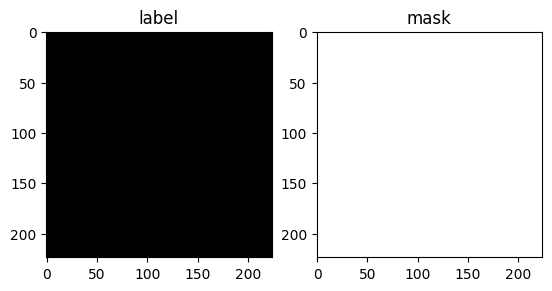

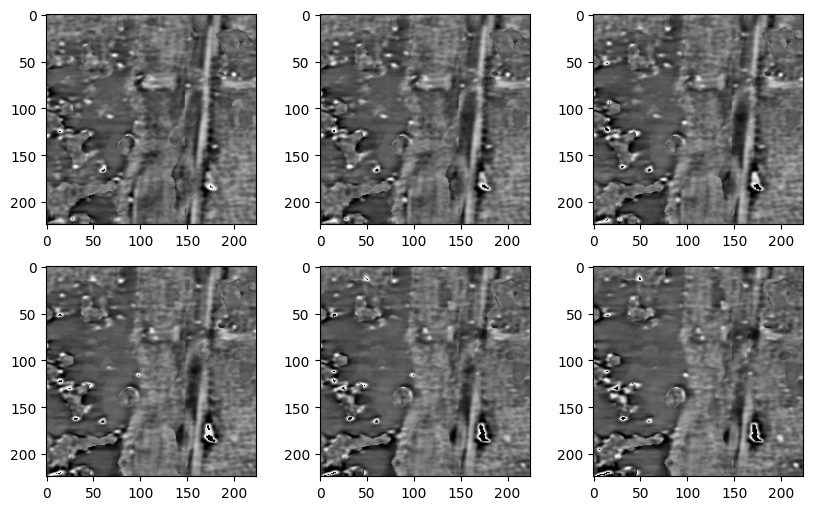

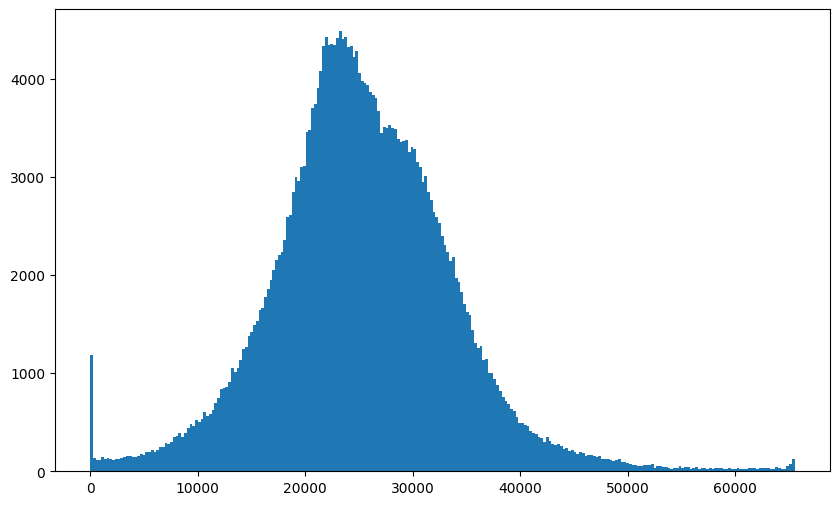

In [4]:
# confirmation

valid_fragment_i = 1
valid_split_i = 0

train_images, train_labels, train_masks, valid_images, valid_labels, valid_xyxys = get_train_valid_dataset(valid_fragment_i, valid_split_i, CFG, preprocess)

print(f"""
{len(train_images) = }
{train_images[0].shape = }
{train_labels[0].shape = }
{train_masks[0].shape = }

{len(valid_images) = }
{valid_images[0].shape = }
{valid_labels[0].shape = }
""")

id = random.randint(0, len(train_labels))
visualize_train_images(id, train_images, train_labels, train_masks)


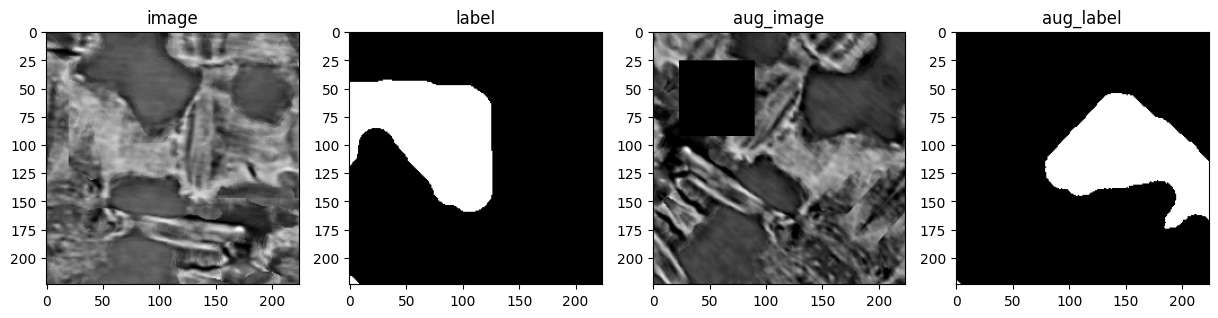

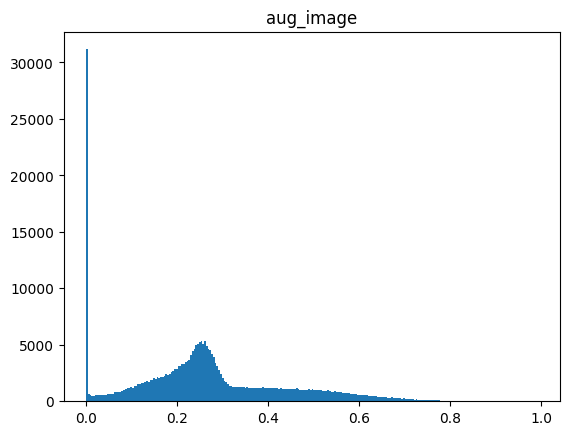

In [5]:
# confirmation
plot_dataset = CustomDataset(train_images, CFG, labels=train_labels)
visualize_dataset(plot_dataset, CFG)


## main

In [6]:
train_and_evaluate(preprocess, CFG)
!curl -X POST -H 'Authorization: Bearer '$LINE -F 'message=セルの実行が終わりました！' https://notify-api.line.me/api/notify

fold: 0


100%|██████████| 131/131 [00:04<00:00, 30.12it/s]


fbeta: 0.2141
Epoch 1 - avg_train_loss: 0.6241  avg_val_loss: 0.4635  avgScore: 0.2141  time: 49s
Epoch 1 - Save Best Loss: 0.4635  Best Score: 0.2141 Model



100%|██████████| 131/131 [00:03<00:00, 33.03it/s]


fbeta: 0.1958
Epoch 2 - avg_train_loss: 0.4113  avg_val_loss: 0.3449  avgScore: 0.1958  time: 45s



100%|██████████| 131/131 [00:03<00:00, 32.88it/s]


fbeta: 0.1500
Epoch 3 - avg_train_loss: 0.2824  avg_val_loss: 0.2463  avgScore: 0.1500  time: 45s



100%|██████████| 131/131 [00:03<00:00, 33.14it/s]


fbeta: 0.4330
Epoch 4 - avg_train_loss: 0.2527  avg_val_loss: 0.2382  avgScore: 0.4330  time: 45s
Epoch 4 - Save Best Loss: 0.2382  Best Score: 0.4330 Model



100%|██████████| 131/131 [00:03<00:00, 33.49it/s]


fbeta: 0.3504
Epoch 5 - avg_train_loss: 0.2435  avg_val_loss: 0.2442  avgScore: 0.3504  time: 45s



100%|██████████| 131/131 [00:03<00:00, 33.33it/s]


fbeta: 0.3902
Epoch 6 - avg_train_loss: 0.2384  avg_val_loss: 0.2543  avgScore: 0.3902  time: 45s



100%|██████████| 131/131 [00:04<00:00, 32.03it/s]


fbeta: 0.3689
Epoch 7 - avg_train_loss: 0.2315  avg_val_loss: 0.2489  avgScore: 0.3689  time: 45s



100%|██████████| 131/131 [00:03<00:00, 33.55it/s]


fbeta: 0.4621
Epoch 8 - avg_train_loss: 0.2287  avg_val_loss: 0.2539  avgScore: 0.4621  time: 45s
Epoch 8 - Save Best Loss: 0.2539  Best Score: 0.4621 Model



100%|██████████| 131/131 [00:03<00:00, 33.35it/s]


fbeta: 0.4073
Epoch 9 - avg_train_loss: 0.2183  avg_val_loss: 0.2474  avgScore: 0.4073  time: 45s



100%|██████████| 131/131 [00:03<00:00, 33.30it/s]


fbeta: 0.4478
Epoch 10 - avg_train_loss: 0.2183  avg_val_loss: 0.2651  avgScore: 0.4478  time: 45s



100%|██████████| 131/131 [00:03<00:00, 33.33it/s]


fbeta: 0.4123
Epoch 11 - avg_train_loss: 0.2114  avg_val_loss: 0.2583  avgScore: 0.4123  time: 45s



100%|██████████| 131/131 [00:03<00:00, 33.25it/s]


fbeta: 0.4304
Epoch 12 - avg_train_loss: 0.2053  avg_val_loss: 0.2534  avgScore: 0.4304  time: 45s



100%|██████████| 131/131 [00:03<00:00, 33.40it/s]


fbeta: 0.4527
Epoch 13 - avg_train_loss: 0.2038  avg_val_loss: 0.2626  avgScore: 0.4527  time: 45s



100%|██████████| 131/131 [00:03<00:00, 34.27it/s]


fbeta: 0.4491
Epoch 14 - avg_train_loss: 0.1991  avg_val_loss: 0.2693  avgScore: 0.4491  time: 45s



100%|██████████| 131/131 [00:03<00:00, 33.33it/s]


fbeta: 0.4288
Epoch 15 - avg_train_loss: 0.1930  avg_val_loss: 0.2674  avgScore: 0.4288  time: 45s



100%|██████████| 131/131 [00:03<00:00, 33.32it/s]


fbeta: 0.4424
Epoch 16 - avg_train_loss: 0.1912  avg_val_loss: 0.2723  avgScore: 0.4424  time: 45s



100%|██████████| 131/131 [00:03<00:00, 33.81it/s]


fbeta: 0.4667
Epoch 17 - avg_train_loss: 0.1886  avg_val_loss: 0.2619  avgScore: 0.4667  time: 46s
Epoch 17 - Save Best Loss: 0.2619  Best Score: 0.4667 Model



100%|██████████| 131/131 [00:03<00:00, 33.21it/s]


fbeta: 0.4430
Epoch 18 - avg_train_loss: 0.1866  avg_val_loss: 0.2668  avgScore: 0.4430  time: 45s



100%|██████████| 131/131 [00:03<00:00, 33.10it/s]


fbeta: 0.4482
Epoch 19 - avg_train_loss: 0.1854  avg_val_loss: 0.2728  avgScore: 0.4482  time: 46s



100%|██████████| 131/131 [00:03<00:00, 33.23it/s]


fbeta: 0.4520
Epoch 20 - avg_train_loss: 0.1830  avg_val_loss: 0.2689  avgScore: 0.4520  time: 45s

fold: 1


100%|██████████| 120/120 [00:03<00:00, 30.59it/s]


fbeta: 0.1734
Epoch 1 - avg_train_loss: 0.7063  avg_val_loss: 0.4390  avgScore: 0.1734  time: 47s
Epoch 1 - Save Best Loss: 0.4390  Best Score: 0.1734 Model



100%|██████████| 120/120 [00:03<00:00, 33.05it/s]


fbeta: 0.2411
Epoch 2 - avg_train_loss: 0.4498  avg_val_loss: 0.2719  avgScore: 0.2411  time: 47s
Epoch 2 - Save Best Loss: 0.2719  Best Score: 0.2411 Model



100%|██████████| 120/120 [00:03<00:00, 32.74it/s]


fbeta: 0.0829
Epoch 3 - avg_train_loss: 0.2957  avg_val_loss: 0.1585  avgScore: 0.0829  time: 46s



100%|██████████| 120/120 [00:03<00:00, 33.22it/s]


fbeta: 0.3509
Epoch 4 - avg_train_loss: 0.2708  avg_val_loss: 0.1590  avgScore: 0.3509  time: 46s
Epoch 4 - Save Best Loss: 0.1590  Best Score: 0.3509 Model



100%|██████████| 120/120 [00:03<00:00, 32.46it/s]


fbeta: 0.3322
Epoch 5 - avg_train_loss: 0.2623  avg_val_loss: 0.1554  avgScore: 0.3322  time: 47s



100%|██████████| 120/120 [00:03<00:00, 32.61it/s]


fbeta: 0.2958
Epoch 6 - avg_train_loss: 0.2569  avg_val_loss: 0.1522  avgScore: 0.2958  time: 46s



100%|██████████| 120/120 [00:03<00:00, 32.81it/s]


fbeta: 0.3759
Epoch 7 - avg_train_loss: 0.2543  avg_val_loss: 0.1546  avgScore: 0.3759  time: 46s
Epoch 7 - Save Best Loss: 0.1546  Best Score: 0.3759 Model



100%|██████████| 120/120 [00:03<00:00, 33.01it/s]


fbeta: 0.3962
Epoch 8 - avg_train_loss: 0.2458  avg_val_loss: 0.1500  avgScore: 0.3962  time: 46s
Epoch 8 - Save Best Loss: 0.1500  Best Score: 0.3962 Model



100%|██████████| 120/120 [00:03<00:00, 32.89it/s]


fbeta: 0.3941
Epoch 9 - avg_train_loss: 0.2390  avg_val_loss: 0.1602  avgScore: 0.3941  time: 46s



100%|██████████| 120/120 [00:03<00:00, 32.80it/s]


fbeta: 0.4144
Epoch 10 - avg_train_loss: 0.2333  avg_val_loss: 0.1628  avgScore: 0.4144  time: 46s
Epoch 10 - Save Best Loss: 0.1628  Best Score: 0.4144 Model



100%|██████████| 120/120 [00:03<00:00, 32.79it/s]


fbeta: 0.4031
Epoch 11 - avg_train_loss: 0.2322  avg_val_loss: 0.1596  avgScore: 0.4031  time: 46s



100%|██████████| 120/120 [00:03<00:00, 32.70it/s]


fbeta: 0.4045
Epoch 12 - avg_train_loss: 0.2293  avg_val_loss: 0.1594  avgScore: 0.4045  time: 46s



100%|██████████| 120/120 [00:03<00:00, 32.36it/s]


fbeta: 0.3835
Epoch 13 - avg_train_loss: 0.2206  avg_val_loss: 0.1599  avgScore: 0.3835  time: 46s



100%|██████████| 120/120 [00:03<00:00, 32.61it/s]


fbeta: 0.4215
Epoch 14 - avg_train_loss: 0.2179  avg_val_loss: 0.1672  avgScore: 0.4215  time: 46s
Epoch 14 - Save Best Loss: 0.1672  Best Score: 0.4215 Model



100%|██████████| 120/120 [00:03<00:00, 32.73it/s]


fbeta: 0.4324
Epoch 15 - avg_train_loss: 0.2112  avg_val_loss: 0.1630  avgScore: 0.4324  time: 46s
Epoch 15 - Save Best Loss: 0.1630  Best Score: 0.4324 Model



100%|██████████| 120/120 [00:03<00:00, 32.73it/s]


fbeta: 0.4165
Epoch 16 - avg_train_loss: 0.2080  avg_val_loss: 0.1609  avgScore: 0.4165  time: 47s



100%|██████████| 120/120 [00:03<00:00, 32.97it/s]


fbeta: 0.4080
Epoch 17 - avg_train_loss: 0.2066  avg_val_loss: 0.1612  avgScore: 0.4080  time: 46s



100%|██████████| 120/120 [00:03<00:00, 32.76it/s]


fbeta: 0.4106
Epoch 18 - avg_train_loss: 0.2044  avg_val_loss: 0.1635  avgScore: 0.4106  time: 46s



100%|██████████| 120/120 [00:03<00:00, 32.68it/s]


fbeta: 0.4226
Epoch 19 - avg_train_loss: 0.2011  avg_val_loss: 0.1655  avgScore: 0.4226  time: 46s



100%|██████████| 120/120 [00:03<00:00, 32.67it/s]


fbeta: 0.4207
Epoch 20 - avg_train_loss: 0.1988  avg_val_loss: 0.1658  avgScore: 0.4207  time: 46s

fold: 2


100%|██████████| 120/120 [00:03<00:00, 32.13it/s]


fbeta: 0.1459
Epoch 1 - avg_train_loss: 0.5916  avg_val_loss: 0.5126  avgScore: 0.1459  time: 47s
Epoch 1 - Save Best Loss: 0.5126  Best Score: 0.1459 Model



100%|██████████| 120/120 [00:03<00:00, 32.26it/s]


fbeta: 0.0275
Epoch 2 - avg_train_loss: 0.3941  avg_val_loss: 0.4226  avgScore: 0.0275  time: 47s



100%|██████████| 120/120 [00:03<00:00, 32.20it/s]


fbeta: 0.2976
Epoch 3 - avg_train_loss: 0.2555  avg_val_loss: 0.3490  avgScore: 0.2976  time: 46s
Epoch 3 - Save Best Loss: 0.3490  Best Score: 0.2976 Model



100%|██████████| 120/120 [00:03<00:00, 32.28it/s]


fbeta: 0.3803
Epoch 4 - avg_train_loss: 0.2235  avg_val_loss: 0.3416  avgScore: 0.3803  time: 46s
Epoch 4 - Save Best Loss: 0.3416  Best Score: 0.3803 Model



100%|██████████| 120/120 [00:03<00:00, 32.38it/s]


fbeta: 0.3096
Epoch 5 - avg_train_loss: 0.2184  avg_val_loss: 0.3522  avgScore: 0.3096  time: 46s



100%|██████████| 120/120 [00:03<00:00, 32.59it/s]


fbeta: 0.4509
Epoch 6 - avg_train_loss: 0.2102  avg_val_loss: 0.3601  avgScore: 0.4509  time: 46s
Epoch 6 - Save Best Loss: 0.3601  Best Score: 0.4509 Model



100%|██████████| 120/120 [00:03<00:00, 32.50it/s]


fbeta: 0.4392
Epoch 7 - avg_train_loss: 0.2090  avg_val_loss: 0.3624  avgScore: 0.4392  time: 46s



100%|██████████| 120/120 [00:03<00:00, 32.52it/s]


fbeta: 0.4510
Epoch 8 - avg_train_loss: 0.2021  avg_val_loss: 0.3613  avgScore: 0.4510  time: 47s
Epoch 8 - Save Best Loss: 0.3613  Best Score: 0.4510 Model



100%|██████████| 120/120 [00:03<00:00, 32.35it/s]


fbeta: 0.4477
Epoch 9 - avg_train_loss: 0.1962  avg_val_loss: 0.3688  avgScore: 0.4477  time: 47s



100%|██████████| 120/120 [00:03<00:00, 33.12it/s]


fbeta: 0.4459
Epoch 10 - avg_train_loss: 0.1930  avg_val_loss: 0.3594  avgScore: 0.4459  time: 46s



100%|██████████| 120/120 [00:03<00:00, 32.44it/s]


fbeta: 0.4207
Epoch 11 - avg_train_loss: 0.1880  avg_val_loss: 0.3881  avgScore: 0.4207  time: 46s



100%|██████████| 120/120 [00:03<00:00, 32.64it/s]


fbeta: 0.4387
Epoch 12 - avg_train_loss: 0.1858  avg_val_loss: 0.3632  avgScore: 0.4387  time: 46s



100%|██████████| 120/120 [00:03<00:00, 32.69it/s]


fbeta: 0.4825
Epoch 13 - avg_train_loss: 0.1801  avg_val_loss: 0.3638  avgScore: 0.4825  time: 46s
Epoch 13 - Save Best Loss: 0.3638  Best Score: 0.4825 Model



100%|██████████| 120/120 [00:03<00:00, 32.66it/s]


fbeta: 0.4685
Epoch 14 - avg_train_loss: 0.1766  avg_val_loss: 0.3967  avgScore: 0.4685  time: 46s



100%|██████████| 120/120 [00:03<00:00, 32.12it/s]


fbeta: 0.4641
Epoch 15 - avg_train_loss: 0.1736  avg_val_loss: 0.3869  avgScore: 0.4641  time: 46s



100%|██████████| 120/120 [00:03<00:00, 32.31it/s]


fbeta: 0.4475
Epoch 16 - avg_train_loss: 0.1704  avg_val_loss: 0.3881  avgScore: 0.4475  time: 47s



100%|██████████| 120/120 [00:03<00:00, 33.46it/s]


fbeta: 0.4614
Epoch 17 - avg_train_loss: 0.1695  avg_val_loss: 0.3838  avgScore: 0.4614  time: 46s



100%|██████████| 120/120 [00:03<00:00, 33.36it/s]


fbeta: 0.4664
Epoch 18 - avg_train_loss: 0.1678  avg_val_loss: 0.3932  avgScore: 0.4664  time: 46s



100%|██████████| 120/120 [00:03<00:00, 33.25it/s]


fbeta: 0.4558
Epoch 19 - avg_train_loss: 0.1645  avg_val_loss: 0.3887  avgScore: 0.4558  time: 45s



100%|██████████| 120/120 [00:03<00:00, 33.52it/s]


fbeta: 0.4562
Epoch 20 - avg_train_loss: 0.1632  avg_val_loss: 0.3975  avgScore: 0.4562  time: 45s

fold: 3


100%|██████████| 120/120 [00:03<00:00, 33.31it/s]


fbeta: 0.0922
Epoch 1 - avg_train_loss: 0.4156  avg_val_loss: 0.4051  avgScore: 0.0922  time: 46s
Epoch 1 - Save Best Loss: 0.4051  Best Score: 0.0922 Model



100%|██████████| 120/120 [00:03<00:00, 33.65it/s]


fbeta: 0.0717
Epoch 2 - avg_train_loss: 0.2984  avg_val_loss: 0.3717  avgScore: 0.0717  time: 46s



100%|██████████| 120/120 [00:03<00:00, 32.91it/s]


fbeta: 0.1408
Epoch 3 - avg_train_loss: 0.2474  avg_val_loss: 0.3335  avgScore: 0.1408  time: 45s
Epoch 3 - Save Best Loss: 0.3335  Best Score: 0.1408 Model



100%|██████████| 120/120 [00:03<00:00, 33.20it/s]


fbeta: 0.4581
Epoch 4 - avg_train_loss: 0.2273  avg_val_loss: 0.3372  avgScore: 0.4581  time: 45s
Epoch 4 - Save Best Loss: 0.3372  Best Score: 0.4581 Model



100%|██████████| 120/120 [00:03<00:00, 33.53it/s]


fbeta: 0.4707
Epoch 5 - avg_train_loss: 0.2226  avg_val_loss: 0.3285  avgScore: 0.4707  time: 45s
Epoch 5 - Save Best Loss: 0.3285  Best Score: 0.4707 Model



100%|██████████| 120/120 [00:03<00:00, 33.50it/s]


fbeta: 0.4031
Epoch 6 - avg_train_loss: 0.2216  avg_val_loss: 0.3194  avgScore: 0.4031  time: 45s



100%|██████████| 120/120 [00:03<00:00, 33.61it/s]


fbeta: 0.4127
Epoch 7 - avg_train_loss: 0.2130  avg_val_loss: 0.3209  avgScore: 0.4127  time: 45s



100%|██████████| 120/120 [00:03<00:00, 33.88it/s]


fbeta: 0.4892
Epoch 8 - avg_train_loss: 0.2090  avg_val_loss: 0.3301  avgScore: 0.4892  time: 45s
Epoch 8 - Save Best Loss: 0.3301  Best Score: 0.4892 Model



100%|██████████| 120/120 [00:03<00:00, 33.60it/s]


fbeta: 0.4530
Epoch 9 - avg_train_loss: 0.2072  avg_val_loss: 0.3581  avgScore: 0.4530  time: 45s



100%|██████████| 120/120 [00:03<00:00, 33.23it/s]


fbeta: 0.4379
Epoch 10 - avg_train_loss: 0.2000  avg_val_loss: 0.3364  avgScore: 0.4379  time: 45s



100%|██████████| 120/120 [00:03<00:00, 33.38it/s]


fbeta: 0.4770
Epoch 11 - avg_train_loss: 0.1946  avg_val_loss: 0.3430  avgScore: 0.4770  time: 45s



100%|██████████| 120/120 [00:03<00:00, 33.61it/s]


fbeta: 0.4874
Epoch 12 - avg_train_loss: 0.1914  avg_val_loss: 0.3483  avgScore: 0.4874  time: 45s



100%|██████████| 120/120 [00:03<00:00, 33.55it/s]


fbeta: 0.4590
Epoch 13 - avg_train_loss: 0.1891  avg_val_loss: 0.3857  avgScore: 0.4590  time: 45s



100%|██████████| 120/120 [00:03<00:00, 33.76it/s]


fbeta: 0.4764
Epoch 14 - avg_train_loss: 0.1847  avg_val_loss: 0.3576  avgScore: 0.4764  time: 45s



100%|██████████| 120/120 [00:03<00:00, 33.55it/s]


fbeta: 0.4510
Epoch 15 - avg_train_loss: 0.1815  avg_val_loss: 0.3449  avgScore: 0.4510  time: 45s



100%|██████████| 120/120 [00:03<00:00, 33.80it/s]


fbeta: 0.4598
Epoch 16 - avg_train_loss: 0.1791  avg_val_loss: 0.3680  avgScore: 0.4598  time: 45s



100%|██████████| 120/120 [00:03<00:00, 33.60it/s]


fbeta: 0.4970
Epoch 17 - avg_train_loss: 0.1749  avg_val_loss: 0.3679  avgScore: 0.4970  time: 45s
Epoch 17 - Save Best Loss: 0.3679  Best Score: 0.4970 Model



100%|██████████| 120/120 [00:03<00:00, 33.24it/s]


fbeta: 0.5016
Epoch 18 - avg_train_loss: 0.1719  avg_val_loss: 0.3645  avgScore: 0.5016  time: 46s
Epoch 18 - Save Best Loss: 0.3645  Best Score: 0.5016 Model



100%|██████████| 120/120 [00:03<00:00, 33.04it/s]


fbeta: 0.5003
Epoch 19 - avg_train_loss: 0.1723  avg_val_loss: 0.3615  avgScore: 0.5003  time: 45s



100%|██████████| 120/120 [00:03<00:00, 33.57it/s]


fbeta: 0.5088
Epoch 20 - avg_train_loss: 0.1688  avg_val_loss: 0.3744  avgScore: 0.5088  time: 45s
Epoch 20 - Save Best Loss: 0.3744  Best Score: 0.5088 Model

fold: 4


100%|██████████| 99/99 [00:02<00:00, 33.11it/s]


fbeta: 0.1546
Epoch 1 - avg_train_loss: 0.5912  avg_val_loss: 0.4444  avgScore: 0.1546  time: 47s
Epoch 1 - Save Best Loss: 0.4444  Best Score: 0.1546 Model



100%|██████████| 99/99 [00:02<00:00, 33.90it/s]


fbeta: 0.2419
Epoch 2 - avg_train_loss: 0.3979  avg_val_loss: 0.3137  avgScore: 0.2419  time: 46s
Epoch 2 - Save Best Loss: 0.3137  Best Score: 0.2419 Model



100%|██████████| 99/99 [00:02<00:00, 33.83it/s]


fbeta: 0.2999
Epoch 3 - avg_train_loss: 0.2836  avg_val_loss: 0.2088  avgScore: 0.2999  time: 47s
Epoch 3 - Save Best Loss: 0.2088  Best Score: 0.2999 Model



100%|██████████| 99/99 [00:02<00:00, 33.82it/s]


fbeta: 0.4337
Epoch 4 - avg_train_loss: 0.2575  avg_val_loss: 0.2634  avgScore: 0.4337  time: 46s
Epoch 4 - Save Best Loss: 0.2634  Best Score: 0.4337 Model



100%|██████████| 99/99 [00:02<00:00, 34.02it/s]


fbeta: 0.4539
Epoch 5 - avg_train_loss: 0.2503  avg_val_loss: 0.2082  avgScore: 0.4539  time: 47s
Epoch 5 - Save Best Loss: 0.2082  Best Score: 0.4539 Model



100%|██████████| 99/99 [00:02<00:00, 33.31it/s]


fbeta: 0.4335
Epoch 6 - avg_train_loss: 0.2449  avg_val_loss: 0.2434  avgScore: 0.4335  time: 47s



100%|██████████| 99/99 [00:02<00:00, 33.56it/s]


fbeta: 0.4584
Epoch 7 - avg_train_loss: 0.2396  avg_val_loss: 0.2059  avgScore: 0.4584  time: 46s
Epoch 7 - Save Best Loss: 0.2059  Best Score: 0.4584 Model



100%|██████████| 99/99 [00:02<00:00, 33.72it/s]


fbeta: 0.4652
Epoch 8 - avg_train_loss: 0.2328  avg_val_loss: 0.2018  avgScore: 0.4652  time: 47s
Epoch 8 - Save Best Loss: 0.2018  Best Score: 0.4652 Model



100%|██████████| 99/99 [00:02<00:00, 33.58it/s]


fbeta: 0.4641
Epoch 9 - avg_train_loss: 0.2284  avg_val_loss: 0.2043  avgScore: 0.4641  time: 46s



100%|██████████| 99/99 [00:02<00:00, 33.54it/s]


fbeta: 0.5050
Epoch 10 - avg_train_loss: 0.2213  avg_val_loss: 0.2068  avgScore: 0.5050  time: 46s
Epoch 10 - Save Best Loss: 0.2068  Best Score: 0.5050 Model



100%|██████████| 99/99 [00:02<00:00, 33.47it/s]


fbeta: 0.4891
Epoch 11 - avg_train_loss: 0.2176  avg_val_loss: 0.2025  avgScore: 0.4891  time: 47s



100%|██████████| 99/99 [00:02<00:00, 33.69it/s]


fbeta: 0.5025
Epoch 12 - avg_train_loss: 0.2126  avg_val_loss: 0.2043  avgScore: 0.5025  time: 47s



100%|██████████| 99/99 [00:02<00:00, 33.52it/s]


fbeta: 0.4908
Epoch 13 - avg_train_loss: 0.2092  avg_val_loss: 0.2096  avgScore: 0.4908  time: 46s



100%|██████████| 99/99 [00:02<00:00, 33.08it/s]


fbeta: 0.4711
Epoch 14 - avg_train_loss: 0.2044  avg_val_loss: 0.2057  avgScore: 0.4711  time: 47s



100%|██████████| 99/99 [00:02<00:00, 34.04it/s]


fbeta: 0.4504
Epoch 15 - avg_train_loss: 0.2022  avg_val_loss: 0.2249  avgScore: 0.4504  time: 46s



100%|██████████| 99/99 [00:02<00:00, 33.64it/s]


fbeta: 0.4586
Epoch 16 - avg_train_loss: 0.1981  avg_val_loss: 0.2244  avgScore: 0.4586  time: 46s



100%|██████████| 99/99 [00:02<00:00, 33.72it/s]


fbeta: 0.4874
Epoch 17 - avg_train_loss: 0.1949  avg_val_loss: 0.2129  avgScore: 0.4874  time: 46s



100%|██████████| 99/99 [00:02<00:00, 33.82it/s]


fbeta: 0.4719
Epoch 18 - avg_train_loss: 0.1923  avg_val_loss: 0.2151  avgScore: 0.4719  time: 46s



100%|██████████| 99/99 [00:02<00:00, 33.53it/s]


fbeta: 0.4866
Epoch 19 - avg_train_loss: 0.1908  avg_val_loss: 0.2166  avgScore: 0.4866  time: 46s



100%|██████████| 99/99 [00:02<00:00, 33.78it/s]


fbeta: 0.4808
Epoch 20 - avg_train_loss: 0.1887  avg_val_loss: 0.2186  avgScore: 0.4808  time: 46s

{"status":200,"message":"ok"}

In [3]:
gt_area_list, dice_list, valid_label_gt_list, label_pred_list = inference_evaluation(CFG)


fbeta: 0.4667
fbeta: 0.4324
fbeta: 0.4825
fbeta: 0.5088
fbeta: 0.5050


In [8]:
print(f"{dice_evaluation(gt_area_list, dice_list):.4f}")


0.4779


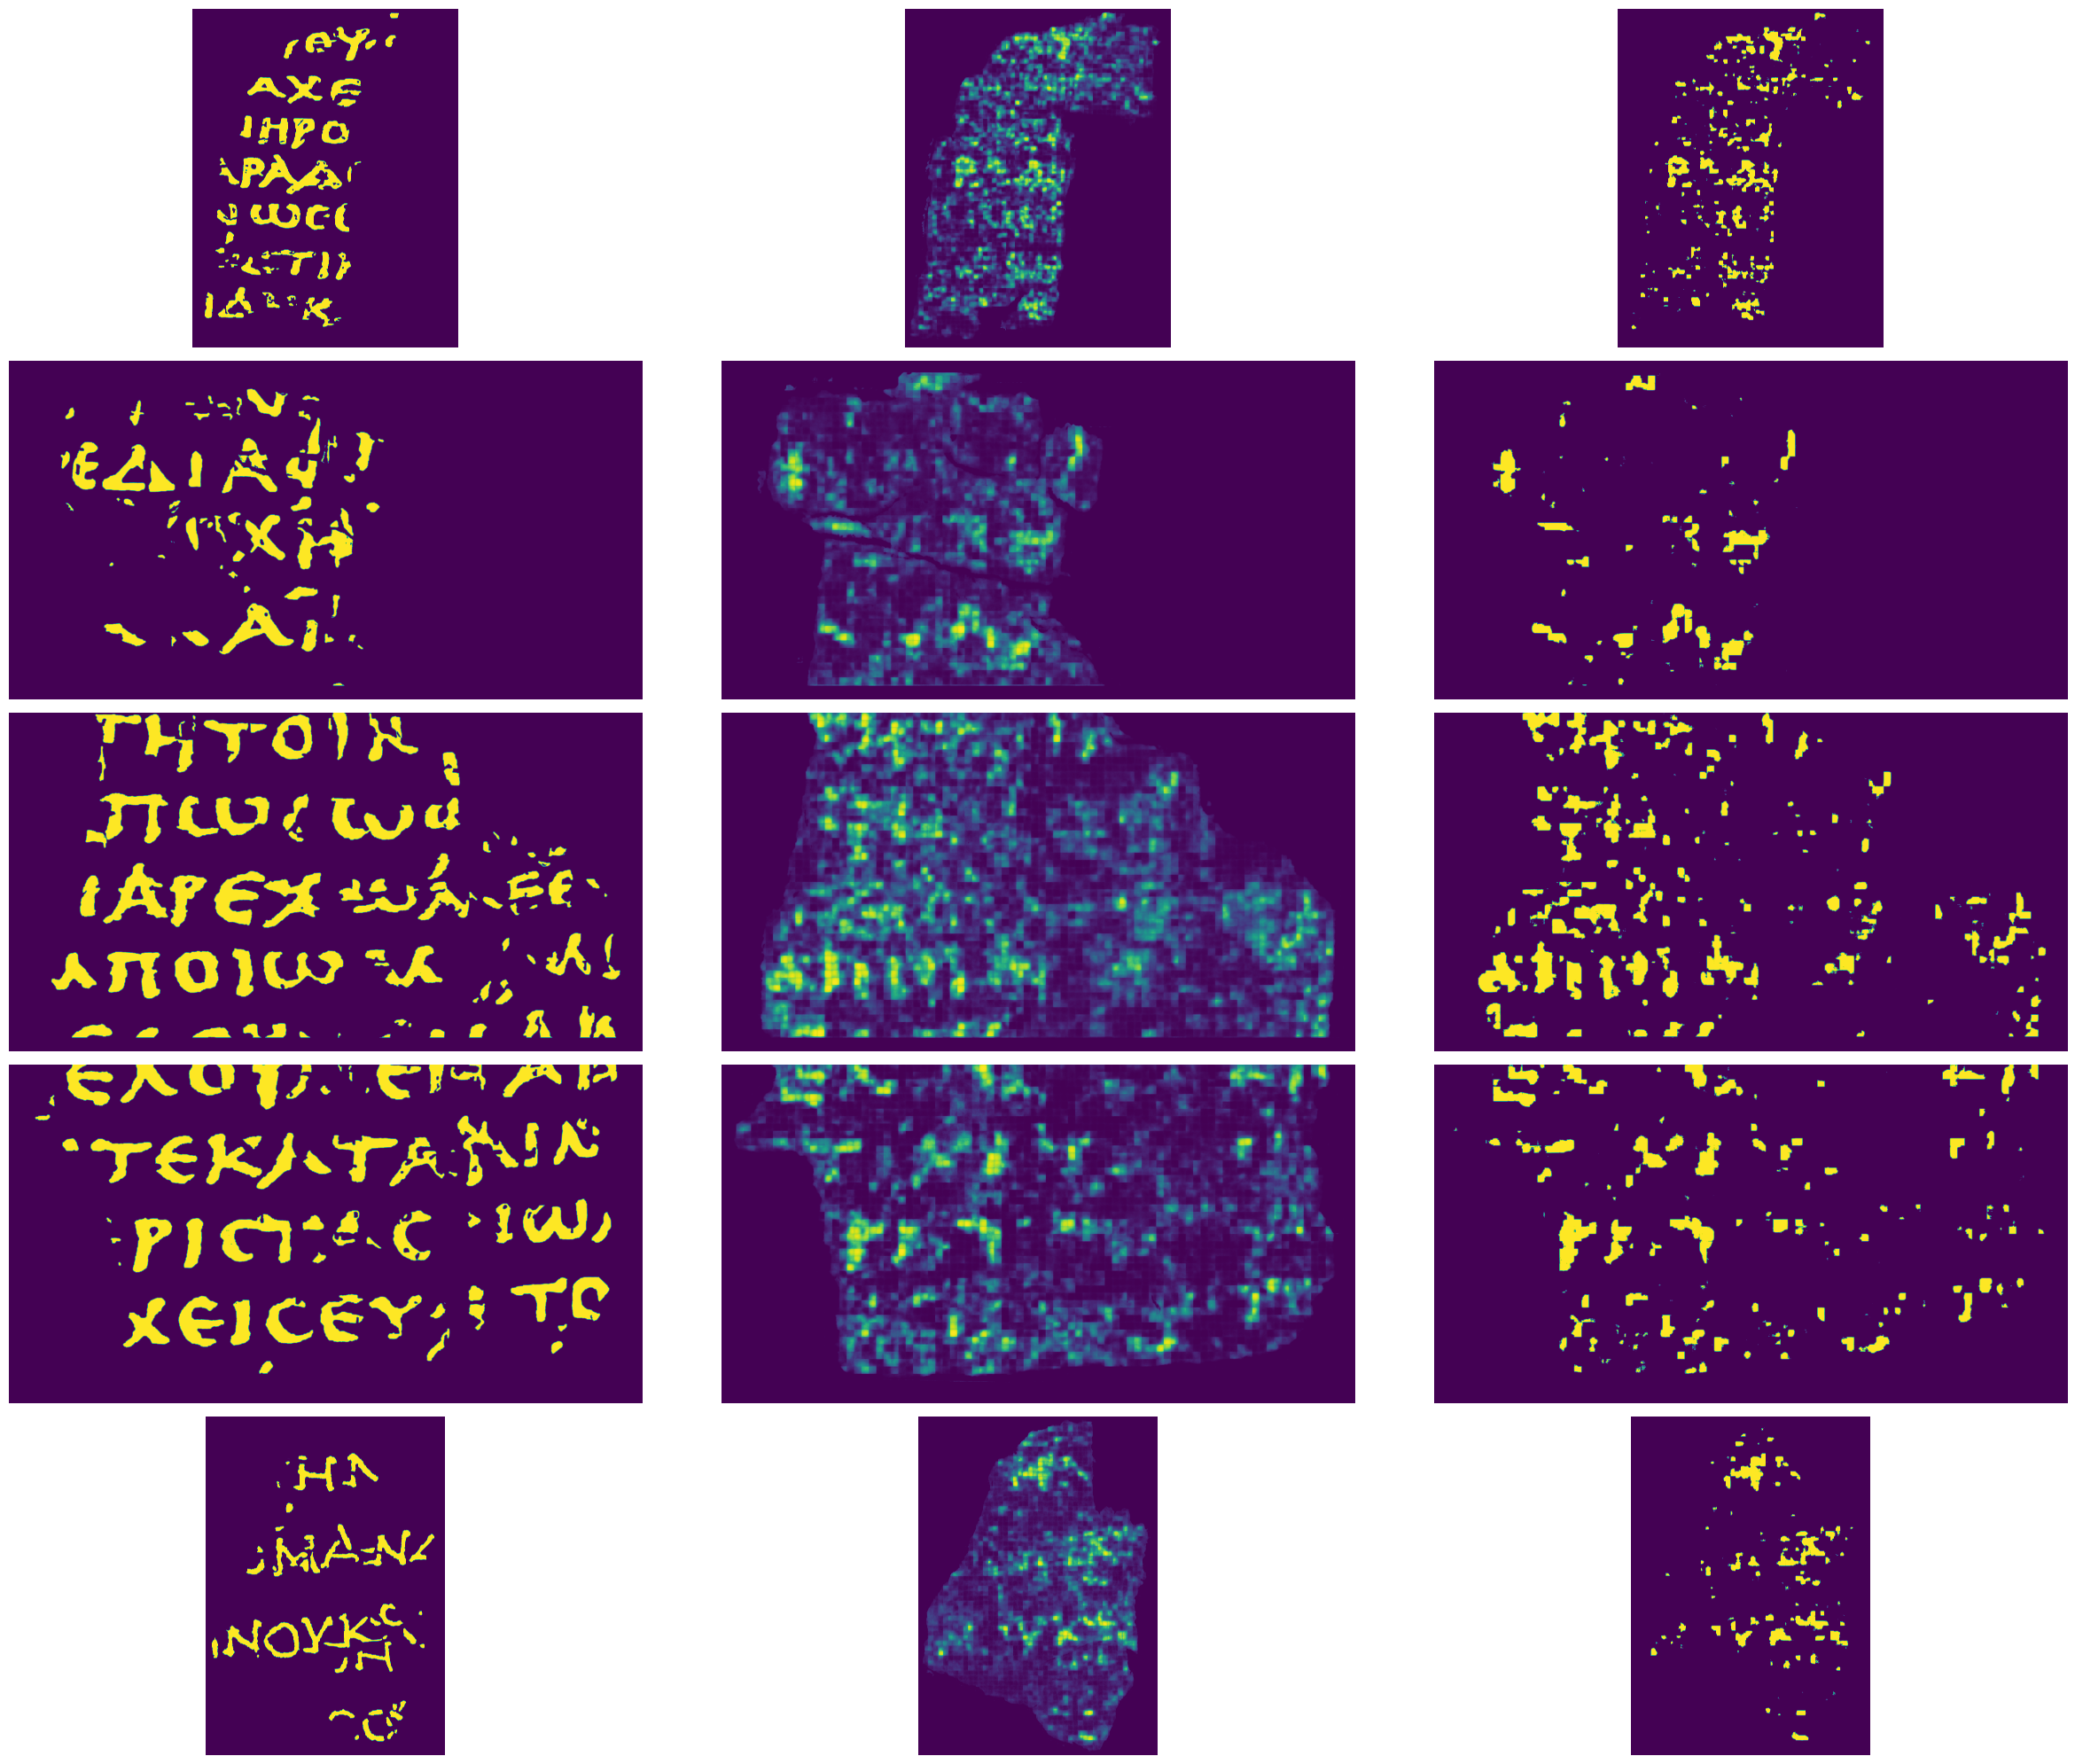

In [4]:
plot_inference(valid_label_gt_list, label_pred_list, CFG)